In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm

In [3]:
plt.style.use('seaborn-poster')

In [5]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

# Figure 4

In [17]:
r = res['mock_5']

In [18]:
r.summary_stats.mean

array([-0.26277   , -0.52193   ,  2.013     ,  2.83810001, 26.043     ])

In [19]:
r.summary_stats.std

array([3.61888437e-06, 2.42961976e-06, 2.81010264e-06, 4.34762313e-05,
       3.47486827e-06])

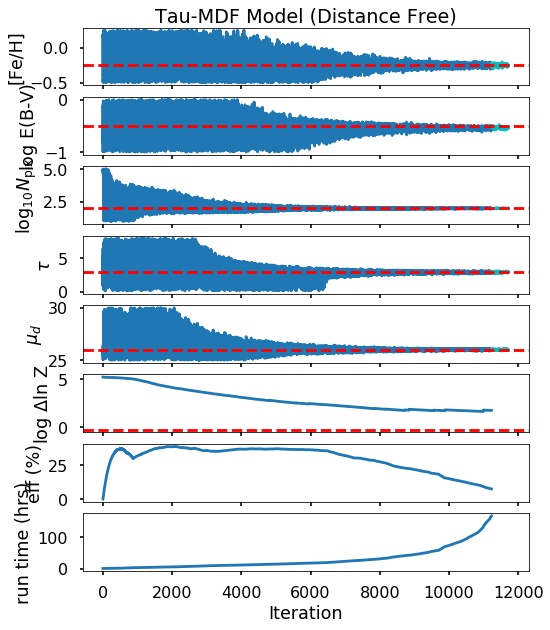

In [20]:
r.plot_chains();

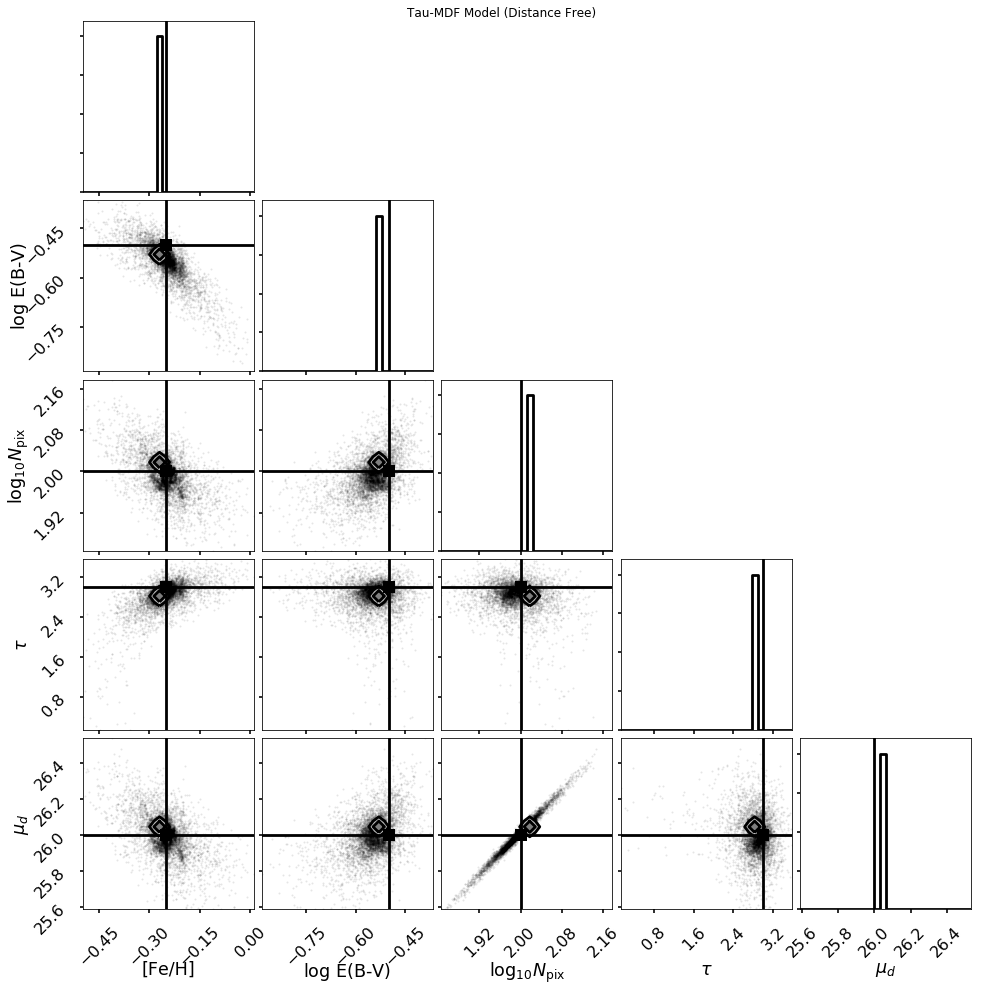

In [21]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(14, 14))
r = res['mock_5']
r.plot_corner(fig=fig, weight=True, burn=6000, show_prior=False, full_range=False, bins=30, truth_color='k',
              smooth_frac=0.02, plot_datapoints=True);

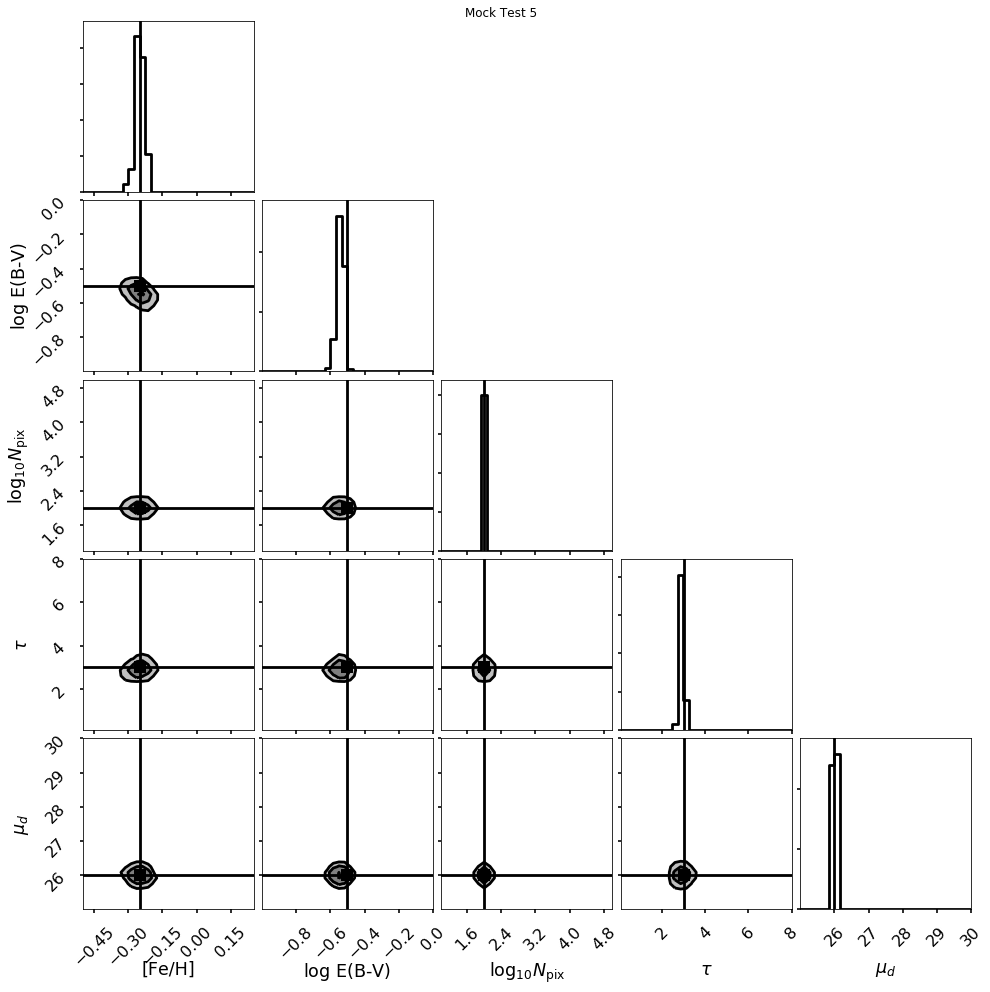

In [20]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(14, 14))
r = res['mock_5']
r.plot_corner(fig=fig, weight=True, burn=6000, show_prior=False, full_range=True, bins=30, truth_color='k',
              smooth_frac=0.02, plot_datapoints=False);

Text(0.5,0.98,'Mock Test')

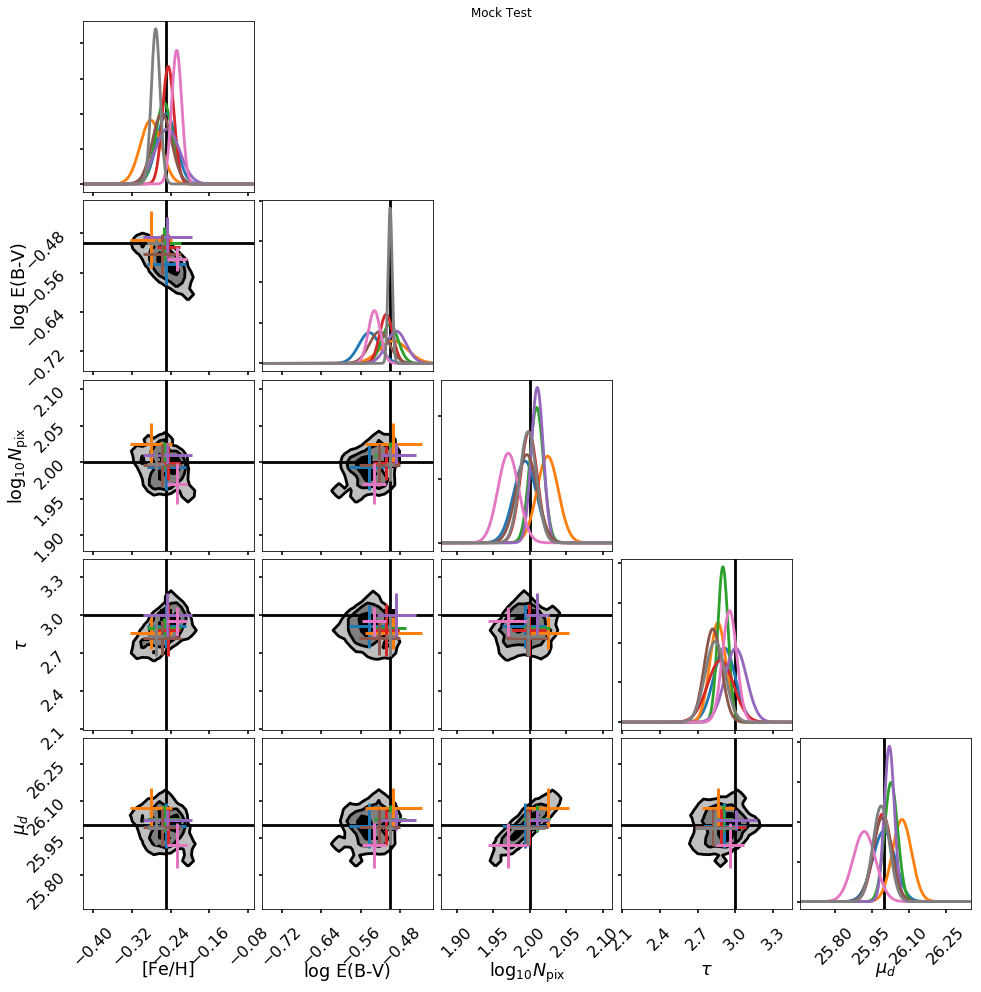

In [16]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(14, 14))
r = res['mock_5']
r.plot_corner(fig=fig, weight=True, burn=7000, show_prior=False,full_range=False, bins=30, truth_color='k',
              smooth_frac=0.02, hist_kwargs={'alpha': 0.}, plot_datapoints=False);
for i in range(5):
    for j in range(5):
        ax = axes[i,j]
        if j > i:
            continue
        for k in ['mock_5', 'mock_18', 'mock_19', 'mock_20', 'mock_21', 'mock_22', 'mock_23', 'mock_24']:
            r = res[k]
            if i == j:
                xl = ax.get_xlim()
                x_temp = np.linspace(xl[0], xl[1], 300)
                y_temp = norm.pdf(x_temp, loc=r.summary_stats.mean[i], scale=r.summary_stats.std[i])
#                 ax.hist(r.df[r.params].values[burn:,i], weights=r.df.weights.values[burn:], density=False, bins=30, histtype='step', lw=2)
                ax.plot(x_temp, y_temp)
                ax.autoscale(axis='y')
            else:
                x, dx = r.summary_stats.mean[j], r.summary_stats.std[j]
                y, dy = r.summary_stats.mean[i], r.summary_stats.std[i]
                ax.errorbar(x, y, yerr=2*dy, xerr=2*dx, elinewidth=3, zorder=10)
        
plt.suptitle('Mock Test')

Text(0.5,0.98,'Initial Conditions')

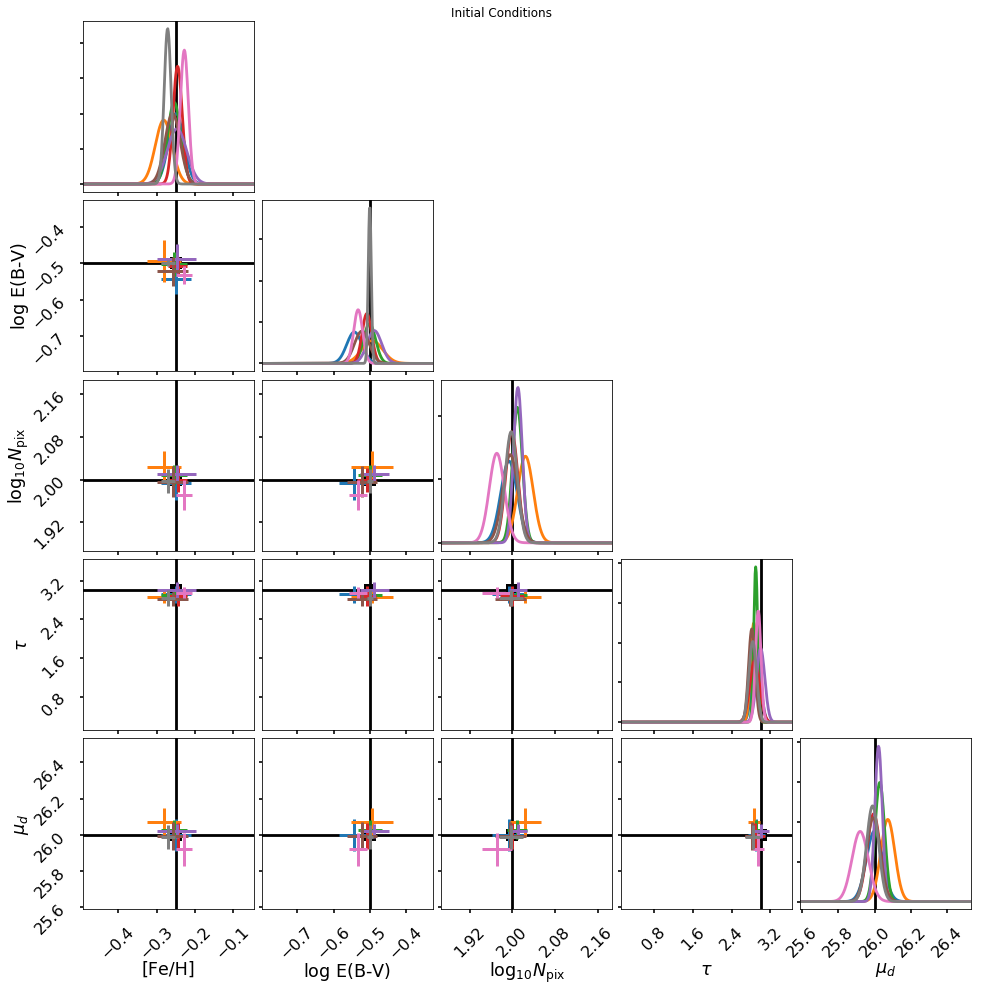

In [73]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(14, 14))
burn = 6000
r.plot_corner(fig=fig, weight=True, burn=burn, show_prior=False, full_range=False, bins=30, truth_color='k',
              smooth_frac=0.02, hist_kwargs={'alpha': 0.}, plot_datapoints=False, plot_contours=False);
for i in range(5):
    for j in range(5):
        ax = axes[i,j]
        if j > i:
            continue
        for k in ['mock_5', 'mock_18', 'mock_19', 'mock_20', 'mock_21', 'mock_22', 'mock_23', 'mock_24']:
            r = res[k]
            if i == j:
                xl = ax.get_xlim()
                x_temp = np.linspace(xl[0], xl[1], 300)
                y_temp = norm.pdf(x_temp, loc=r.summary_stats.mean[i], scale=r.summary_stats.std[i])
                ax.plot(x_temp, y_temp)
                ax.autoscale(axis='y')
            else:
                x, dx = r.summary_stats.mean[j], r.summary_stats.std[j]
                y, dy = r.summary_stats.mean[i], r.summary_stats.std[i]
                ax.errorbar(x, y, yerr=2*dy, xerr=2*dx, elinewidth=3, zorder=10)
plt.suptitle('Initial Conditions')

In [114]:
res['mock_8'].summary_stats.mean

array([-0.27338793, -0.5548411 , -1.81827994, -0.69060581, -0.63309408,
        0.72995526,  1.98058479, 26.02083602,  2.00630094])

In [120]:
res['mock_7'].summary_stats.std

array([0.00226575, 0.00196756, 0.06727953, 0.02043552, 0.04625451,
       0.02237546, 0.00114134, 0.00031575])

In [121]:
res['mock_8'].summary_stats.std

array([0.0053175 , 0.00543263, 0.05462204, 0.02896068, 0.04974353,
       0.02673717, 0.00272671, 0.00682837, 0.00199436])

In [126]:
res['mock_8'].df[res['mock_8'].params].values[4000:].std(axis=0)

array([0.08326432, 0.09190759, 0.5058249 , 0.33589512, 0.38561736,
       0.31758816, 0.07232436, 0.16735697, 0.05774447])

In [125]:
res['mock_8'].df[res['mock_8'].params].values[4000:].mean(axis=0)b

array([-0.25978664, -0.56811879, -1.78331028, -0.94854292, -0.4424187 ,
        0.72539194,  1.97603974, 26.05769412,  2.01157637])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1341c1048>,
      dtype=object)

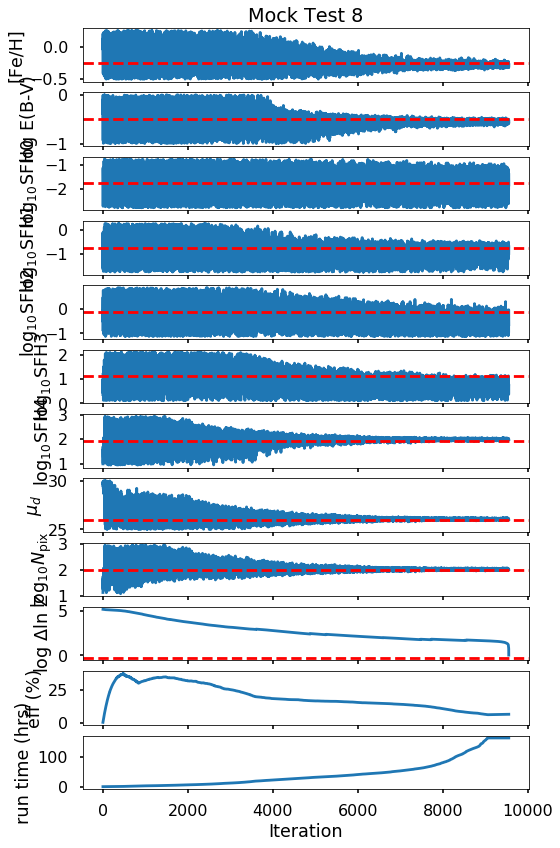

In [19]:
res['mock_8'].plot_chains(chains_only=False)

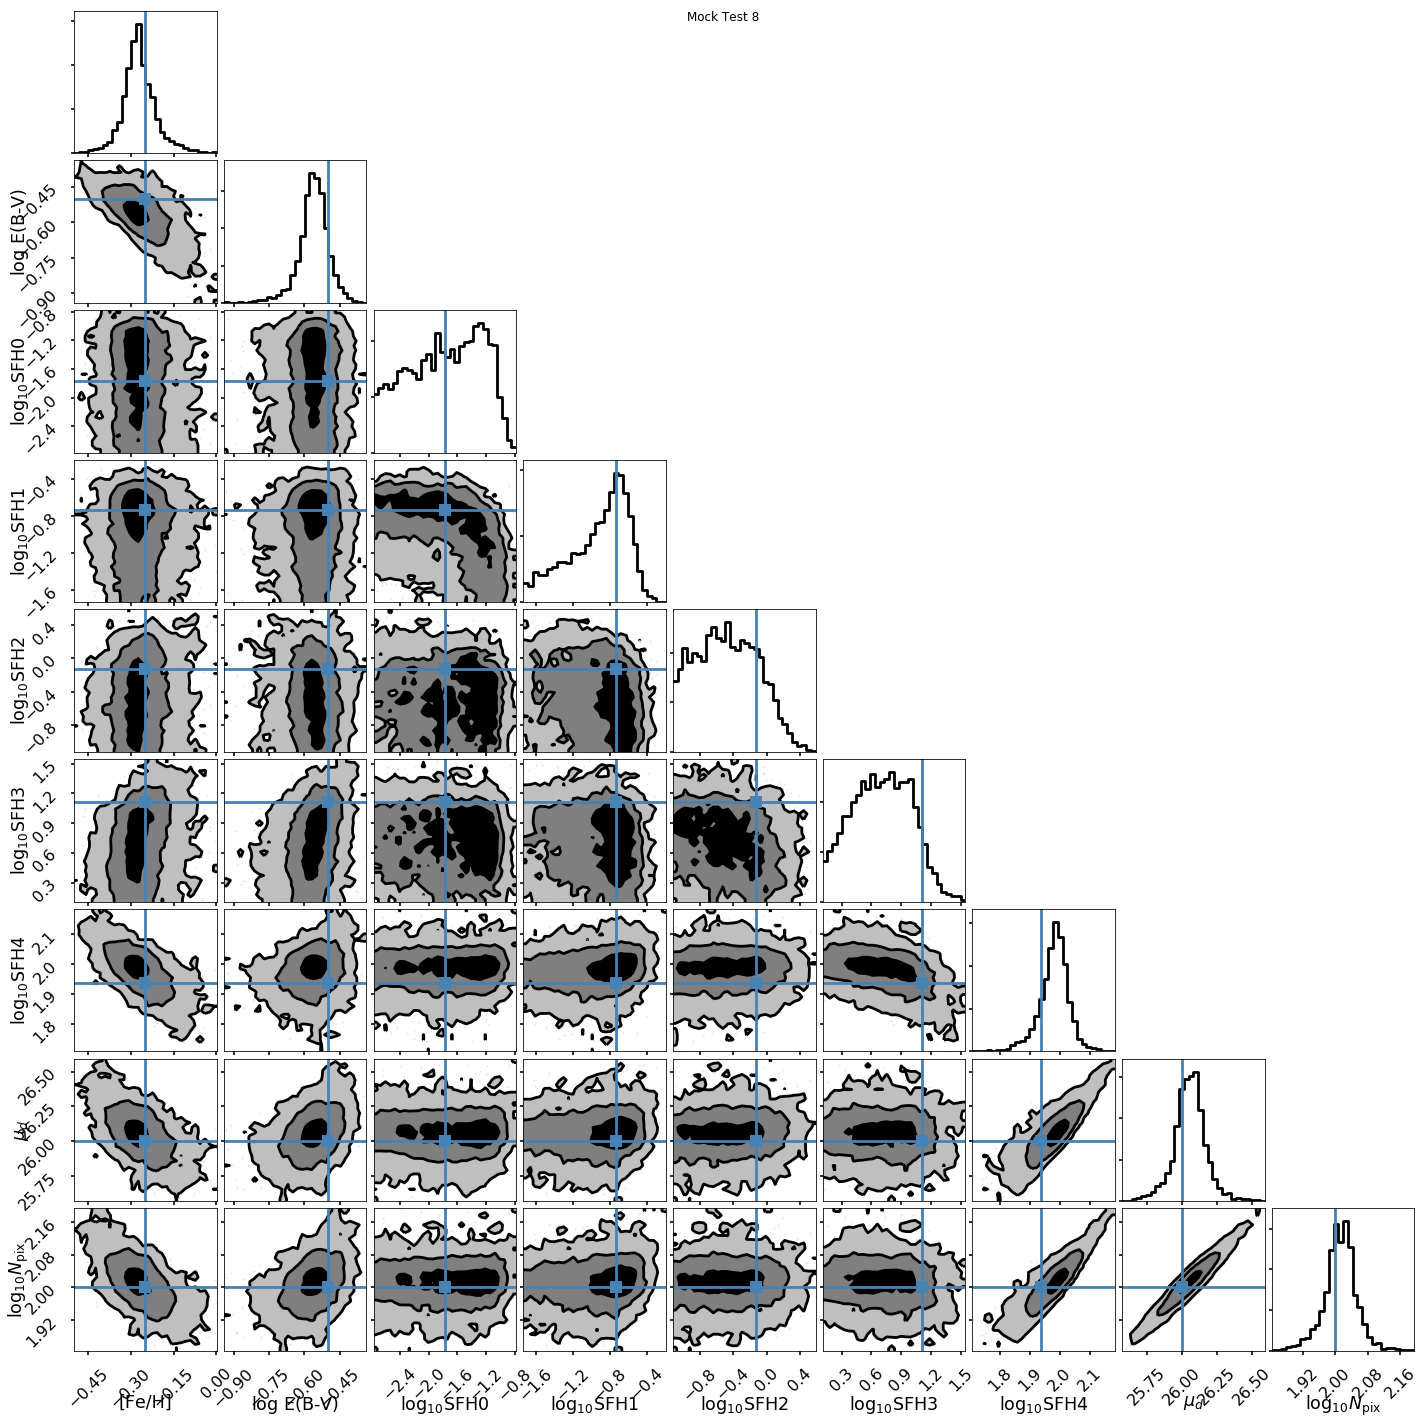

In [18]:
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(20, 20))
r = res['mock_8']
r.plot_corner(fig=fig, weight=False, burn=5000, show_prior=False, full_range=False, bins=30,
              smooth_frac=0.02);

# Figure 5

In [92]:
r.true_params

[-0.25, -0.5, 2.0, 3.0, 26.0]

In [ ]:
plt.violinplot

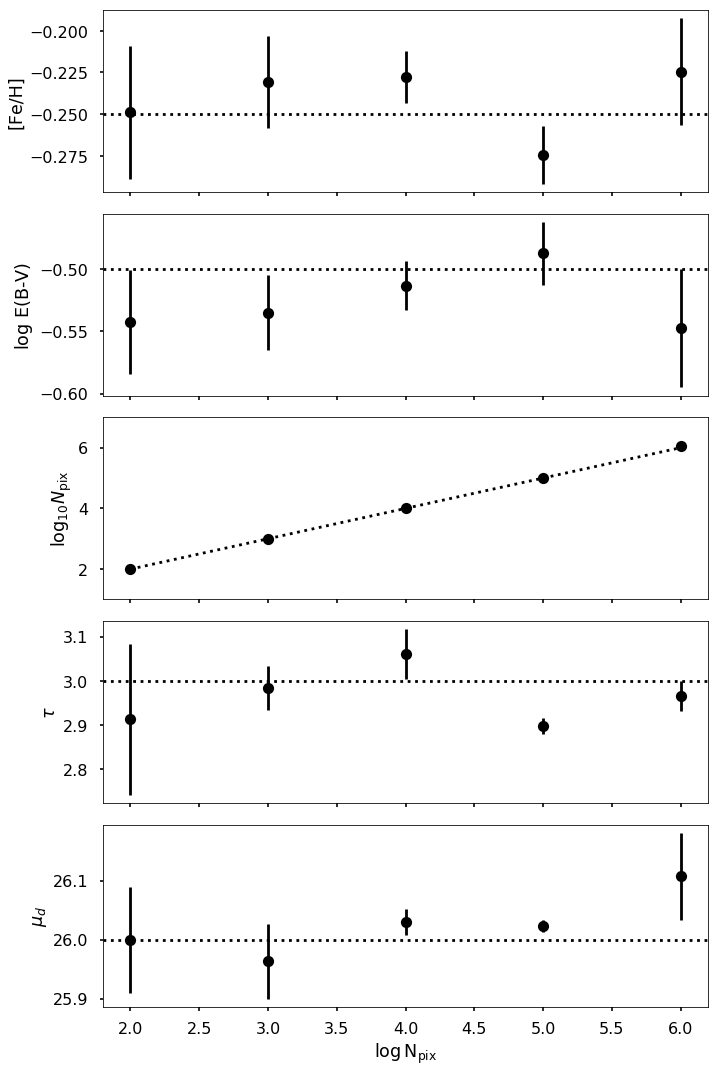

In [110]:
fig, axes = plt.subplots(nrows=5, figsize=(10, 15), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
for i in range(5):
    ax = axes[i]
    for N, k in zip(Npixs, keys):
        ax.errorbar(N, res[k].summary_stats.mean[i], 2.*res[k].summary_stats.std[i], marker='o', color='k')
    if i == 2:
        ax.plot(Npixs, Npixs, 'k:')
    else:
        ax.axhline(y=res['mock_5'].true_params[i], color='k', ls=':')
    ax.set_ylabel(res['mock_5'].labels[i])
    x_ = res['mock_5'].df[res['mock_5'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[2].set_ylim([1, 7])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$')
plt.tight_layout()

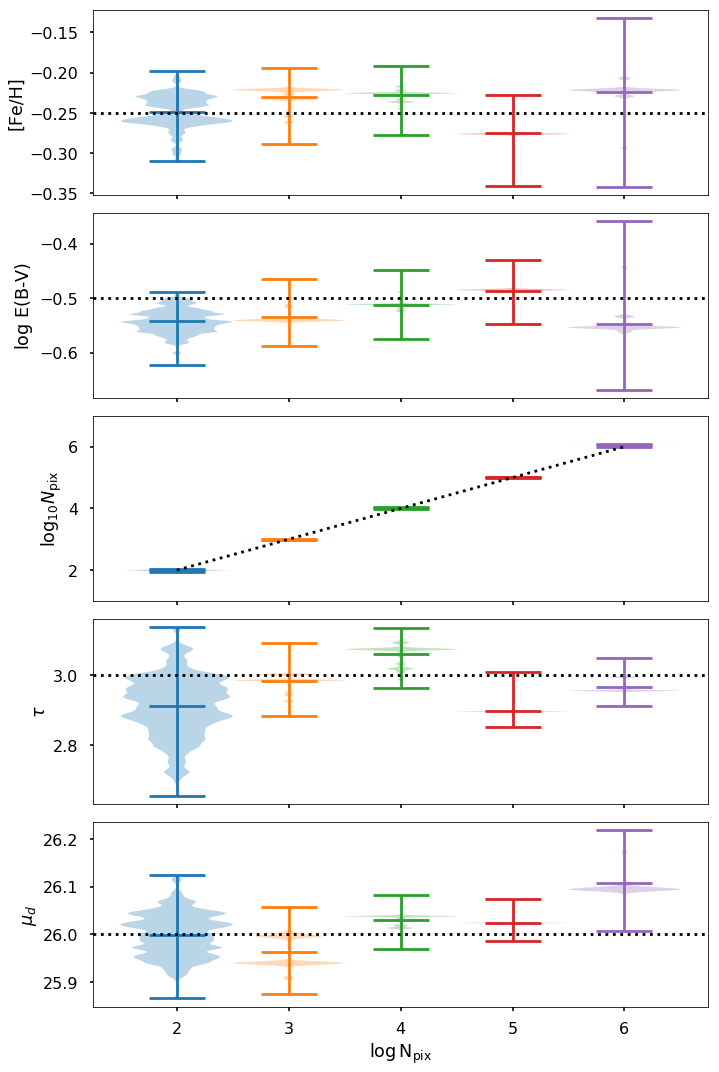

In [109]:
fig, axes = plt.subplots(nrows=5, figsize=(10, 15), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
for i in range(5):
    ax = axes[i]
    for N, k in zip(Npixs, keys):
        xs = np.random.choice(res[k].df[res[k].params].values[:,i], size=100000, replace=True, p=res[k].df.weights)
#         ax.errorbar(N, res[k].summary_stats.mean[i], 2.*res[k].summary_stats.std[i], marker='o', color='k'
        ax.violinplot([xs], positions=[N], widths=1.0, showmeans=True, showextrema=True, points=300)
    if i == 2:
        ax.plot(Npixs, Npixs, 'k:')
    else:
        ax.axhline(y=res['mock_5'].true_params[i], color='k', ls=':')
    ax.set_ylabel(res['mock_5'].labels[i])
    x_ = res['mock_5'].df[res['mock_5'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[2].set_ylim([1, 7])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$')
plt.tight_layout()

# Figure 6

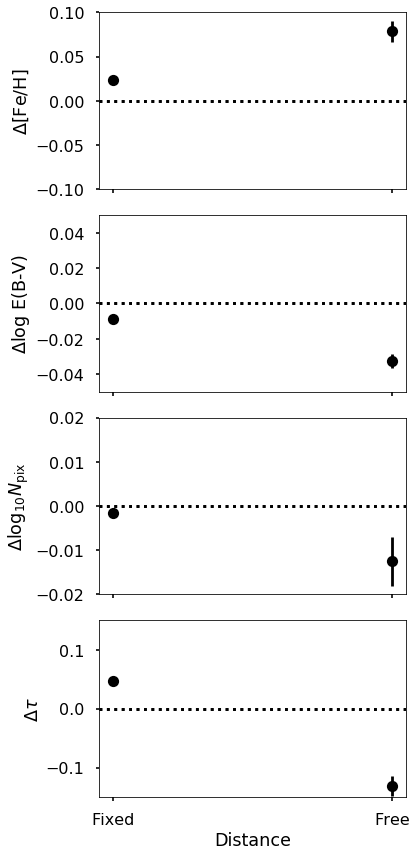

In [146]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
keys = ['mock_1', 'mock_3']
Npixs = [0, 1]
for i in range(4):
    ax = axes[i]
    for N, k in zip(Npixs, keys):
        ax.errorbar(N, res[k].summary_stats.mean[i]-res[k].true_params[i], 2.*res[k].summary_stats.std[i], marker='o', color='k')
        ax.axhline(y=0, color='k', ls=':')
    ax.set_ylabel(r'$\Delta$' + res['mock_1'].labels[i])
    x_ = res['mock_1'].df[res['mock_1'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.05, 0.05])
axes[2].set_ylim([-0.02, 0.02])
axes[3].set_ylim([-0.15, 0.15])
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels(['Fixed', 'Free'])
axes[-1].set_xlabel('Distance')
plt.tight_layout()

In [152]:
res['mock_5'].summary_stats.mean

array([-0.24888938, -0.5424546 ,  1.993435  ,  2.91254209, 25.99913878])

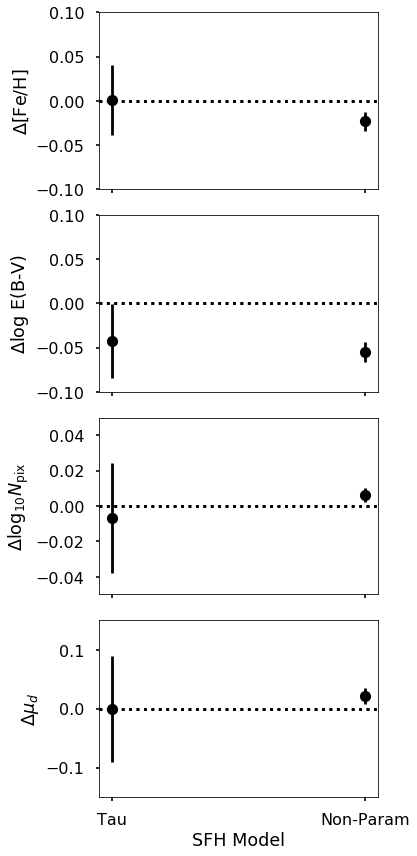

In [153]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
keys = ['mock_5', 'mock_8']
Npixs = [0, 1]
ps = ['logfeh_mean', 'logdust_med', 'logNpix', 'dmod']
for i in range(4):
    ax = axes[i]
    p = ps[i]
    for N, k in zip(Npixs, keys):
        results = res[k]
        idx = results.params.index(p)
        ax.errorbar(N, results.summary_stats.mean[idx]-results.true_params[idx], 2.*results.summary_stats.std[idx], marker='o', color='k')
        ax.axhline(y=0, color='k', ls=':')
        ax.set_ylabel(r'$\Delta$' + results.labels[idx])
#     x_ = res['mock_1'].df[res['mock_1'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
axes[2].set_ylim([-0.05, 0.05])
axes[3].set_ylim([-0.15, 0.15])
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels(['Tau', 'Non-Param'])
axes[-1].set_xlabel('SFH Model')
plt.tight_layout()